**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

**MEMBACA DATA CSV**

In [ ]:
data = pd.read_csv('/content/Hotel Reservations.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**MEMBATASI DATA MENJADI 500 ROWS DARI ASALNYA 36.275 ROWS**
**AGAR PADA SAAT TREE PLOT TIDAK MEMAKAN BANYAK WAKTU DAN CABANG POHONNYA TIDAK SANGAT DALAM**

In [ ]:
data = data.sample(n=500, random_state=42)

**MENGUBAH TIPE DATA BOOKING ID MENJADI INTEGER DARI ASALNYA STRING**

In [ ]:
data['Booking_ID'] = data['Booking_ID'].str.replace('INN', '').astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            10 non-null     int64  
 1   no_of_adults                          10 non-null     float64
 2   no_of_children                        10 non-null     float64
 3   no_of_weekend_nights                  10 non-null     float64
 4   no_of_week_nights                     10 non-null     float64
 5   type_of_meal_plan                     10 non-null     int64  
 6   required_car_parking_space            10 non-null     float64
 7   room_type_reserved                    10 non-null     int64  
 8   lead_time                             10 non-null     float64
 9   arrival_year                          10 non-null     float64
 10  arrival_month                         10 non-null     float64
 11  arrival_date          

**KONVERSI KOLOM KATEGORIKAL KE NUMERIK**

In [ ]:
labelencoder = LabelEncoder()
categorical_features = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'Booking_ID']
data[categorical_features] = data[categorical_features].apply(lambda x: labelencoder.fit_transform(x))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 4968 to 6562
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            500 non-null    int64  
 1   no_of_adults                          500 non-null    int64  
 2   no_of_children                        500 non-null    int64  
 3   no_of_weekend_nights                  500 non-null    int64  
 4   no_of_week_nights                     500 non-null    int64  
 5   type_of_meal_plan                     500 non-null    int64  
 6   required_car_parking_space            500 non-null    int64  
 7   room_type_reserved                    500 non-null    int64  
 8   lead_time                             500 non-null    int64  
 9   arrival_year                          500 non-null    int64  
 10  arrival_month                         500 non-null    int64  
 11  arrival_date        

**PEMBAGIAN DATA KE DALAM FITUR DAN TARGET**

In [ ]:
# Drop 'verification.result' from features
X = df.drop('verification.result', axis=1)

# Use 'verification.result' as target variable
y = df['verification.result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

**PEMBUATAN DAN PELATIHAN DECISION TREE CLASSIFIER**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

**MEMBUAT PREDIKSI**

In [ ]:
y_pred = clf.predict(X_test)

**VISUALISASI DECISION TREE CLASSIFIER**

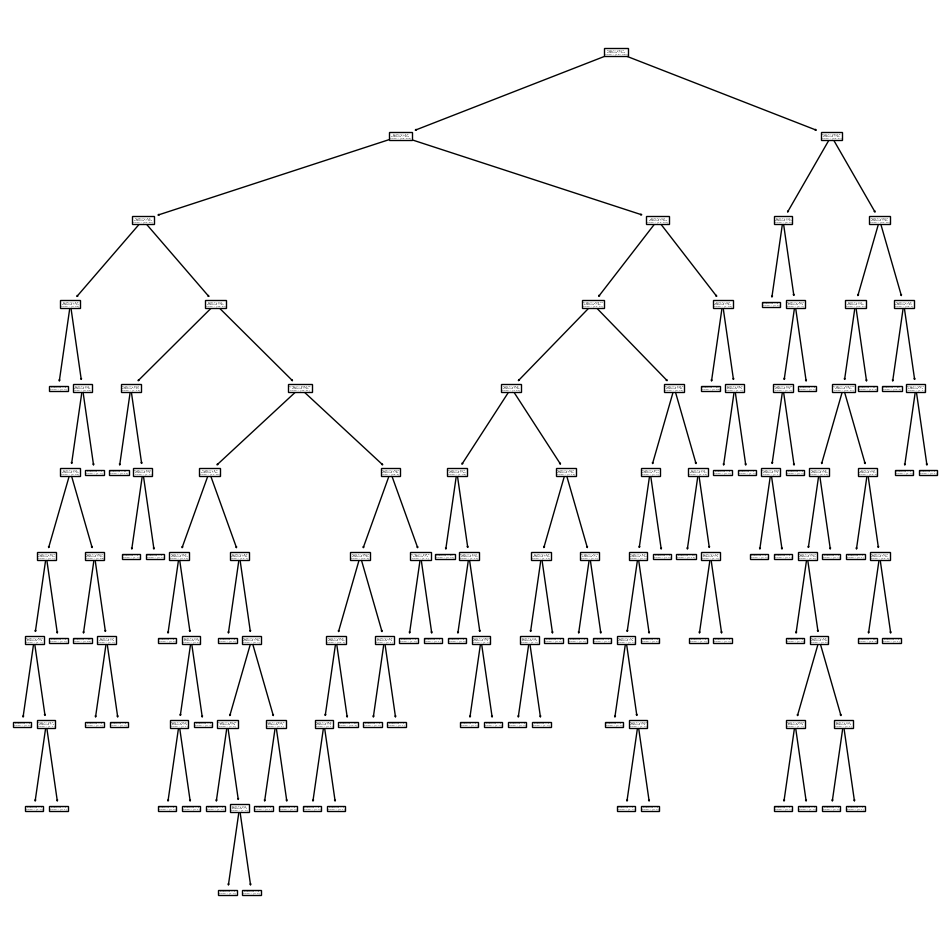

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust size as needed
tree.plot_tree(clf, ax=ax)
plt.show()

**MENGHITUNG DAN MENCETAK SKOR AKURASI**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 74.0%


###CHECKING MISSING VALUE

In [ ]:
# check for missing values (periksa nilai yang hilang)
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

###CHECKING DUPLICATES

In [ ]:
duplicate_rows = data.duplicated()
print("Jumlah baris yang duplikat: ", duplicate_rows.sum())

Jumlah baris yang duplikat:  0


###BOX PLOT

<Axes: ylabel='Booking_ID'>

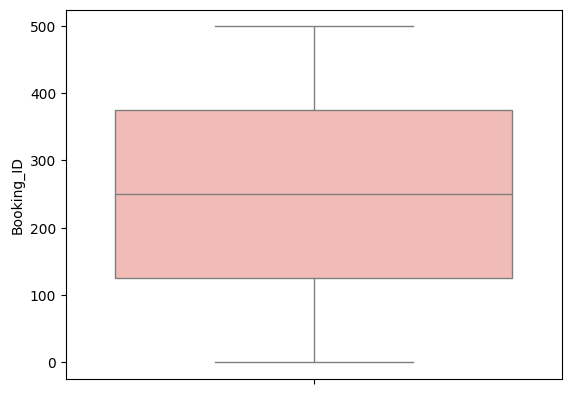

In [ ]:
# Using Seaborn to create a box plot
sns.boxplot(y='Booking_ID', data=data)

###COUNT PLOT

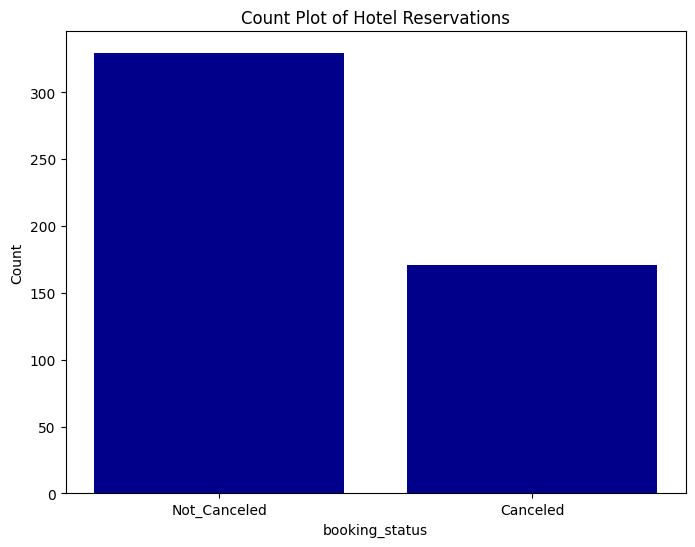

In [ ]:
# Assuming 'dataset' is your DataFrame with weather data
booking_status = data['booking_status'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(booking_status.index, booking_status, color='darkblue')
plt.title('Count Plot of Hotel Reservations')
plt.xlabel('booking_status')
plt.ylabel('Count')
plt.show()

###KERNEL DENSITY PLOT

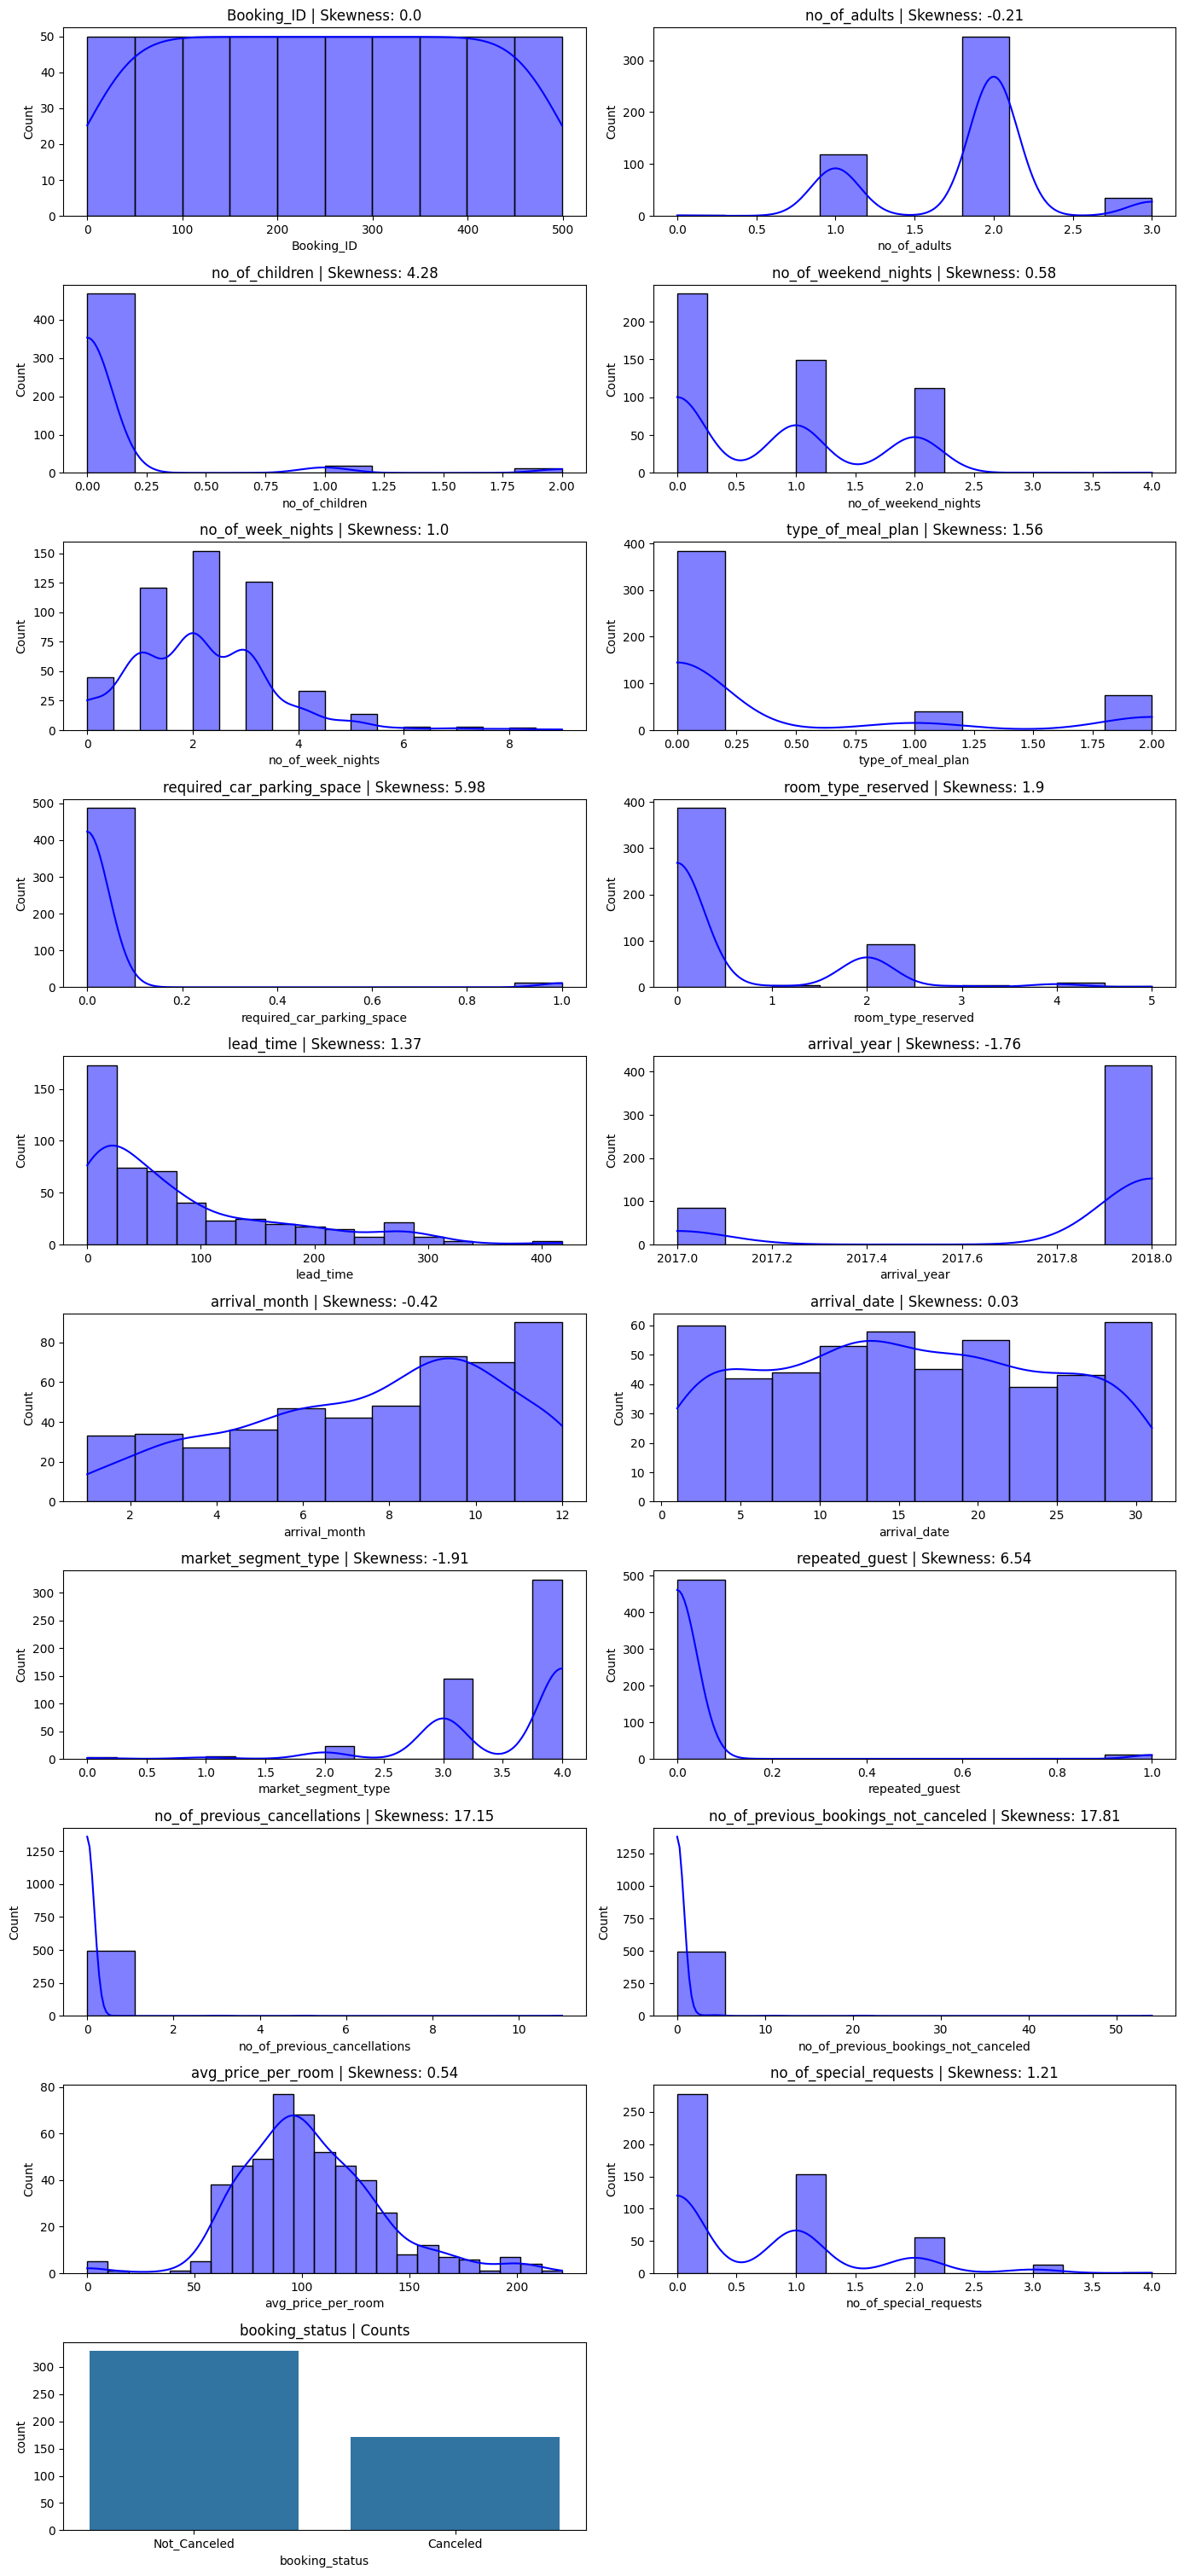

In [ ]:
# Identify all columns
all_columns = data.columns

# Plot distribution of each feature
plt.figure(figsize=(14, len(all_columns) * 3))
for idx, feature in enumerate(all_columns, 1):
    plt.subplot(len(all_columns), 2, idx)
    if data[feature].dtype in ['int64', 'float64']:
        sns.histplot(data[feature], kde=True, color='blue')
        plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")
    else:
        sns.countplot(data=data, x=feature)
        plt.title(f"{feature} | Counts")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

###SWARM PLOT

<ipython-input-68-353a2dd27d8a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="booking_status", y="Booking_ID", data=data, palette='viridis')


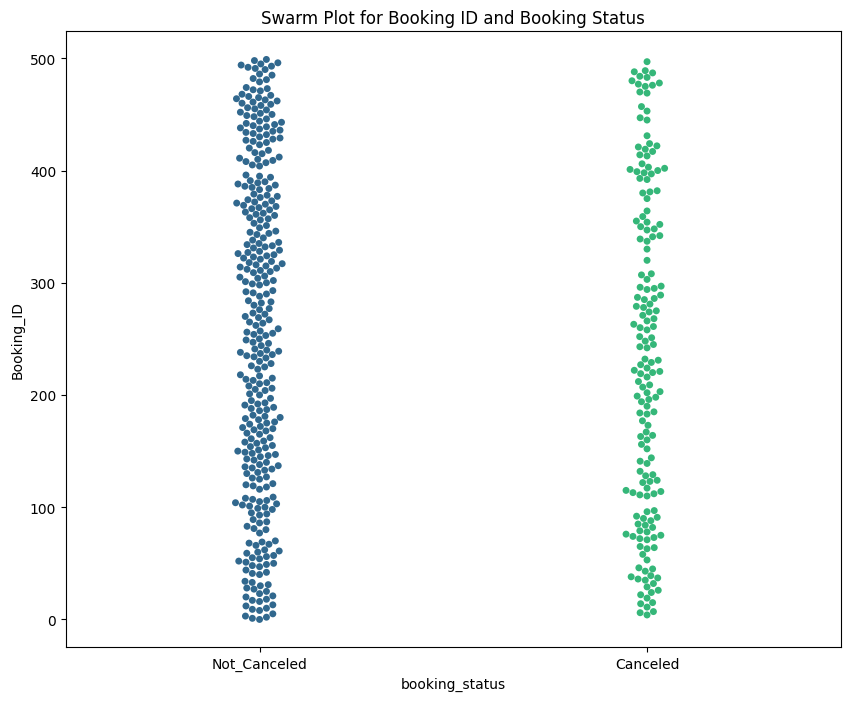

In [ ]:
# Assuming 'dataset' is your DataFrame with hotel reservations data
plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="booking_status", y="Booking_ID", data=data, palette='viridis')

plt.title('Swarm Plot for Booking ID and Booking Status')
plt.xlabel('booking_status')
plt.ylabel('Booking_ID')
plt.show()

###BE VARIATE ANALYSIS

<Figure size 1000x600 with 0 Axes>

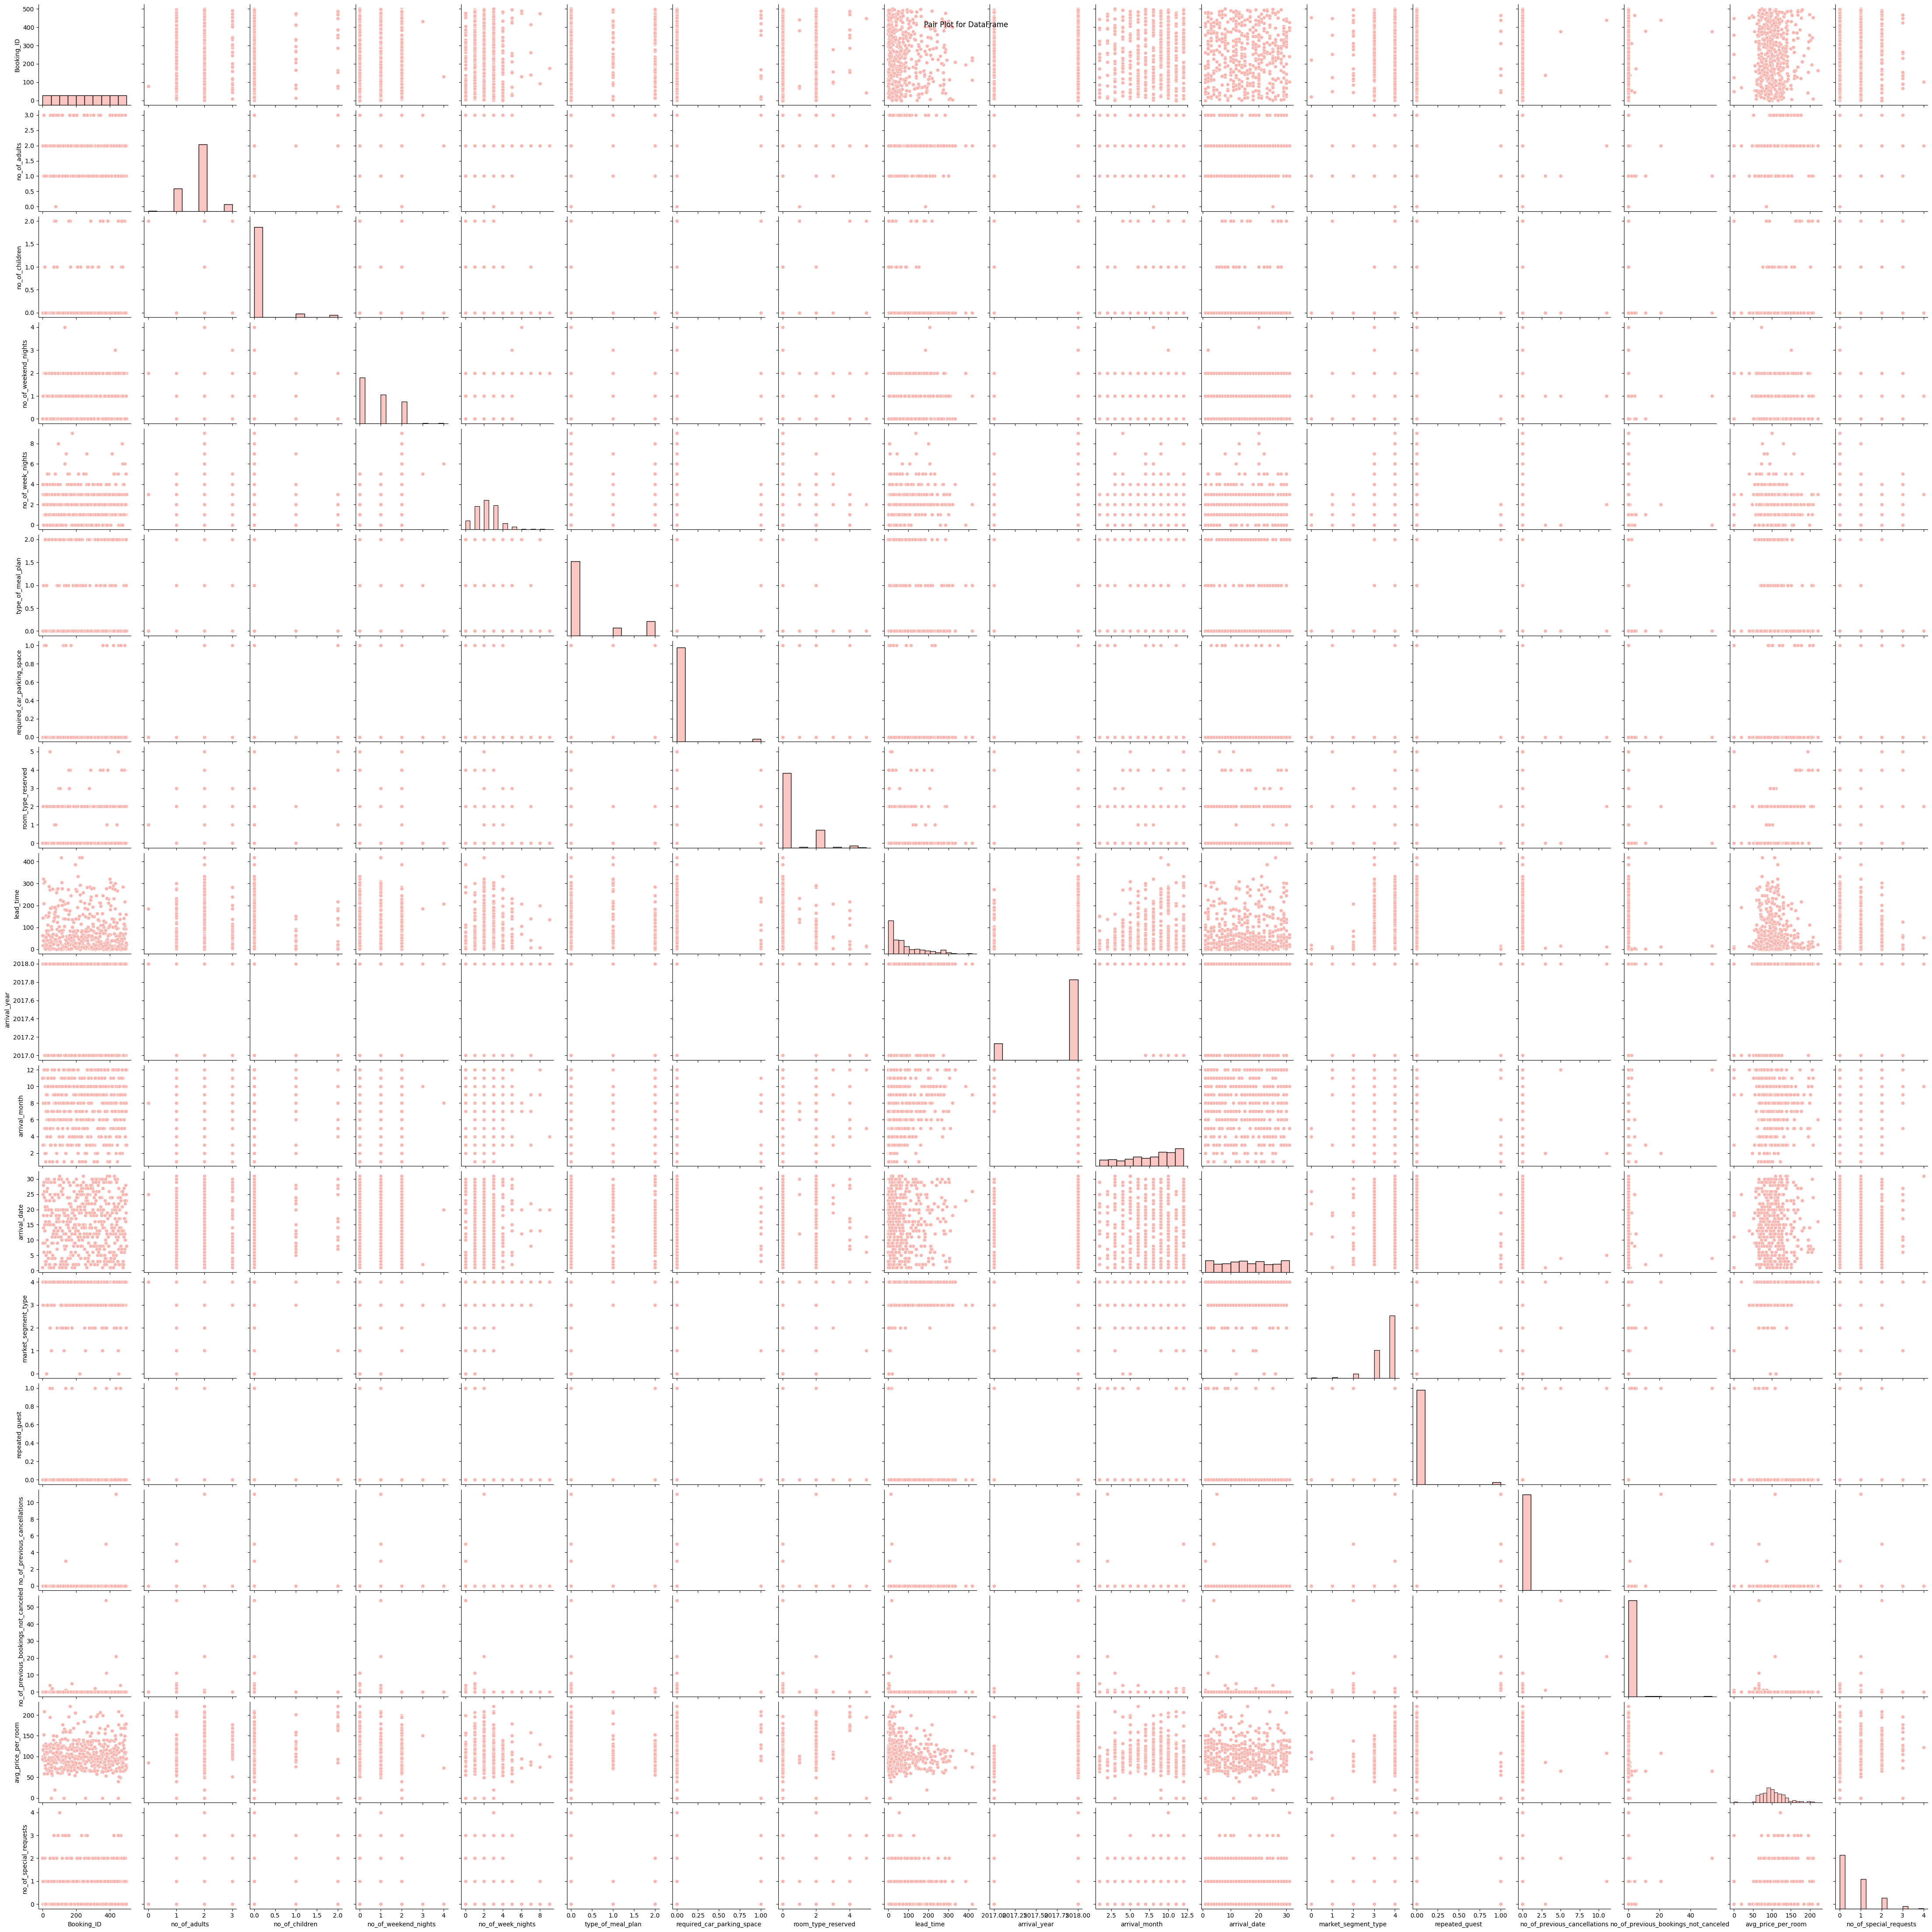

In [ ]:
# Set the color palette
sns.set_palette("Pastel1")

# Assuming 'dataset' is your DataFrame
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(data)

plt.suptitle('Pair Plot for DataFrame')
plt.show()


###VIOLIN PLOT

<ipython-input-26-9c81b92d162c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="booking_status", y="Booking_ID", data=data, palette='viridis', alpha=0.7)


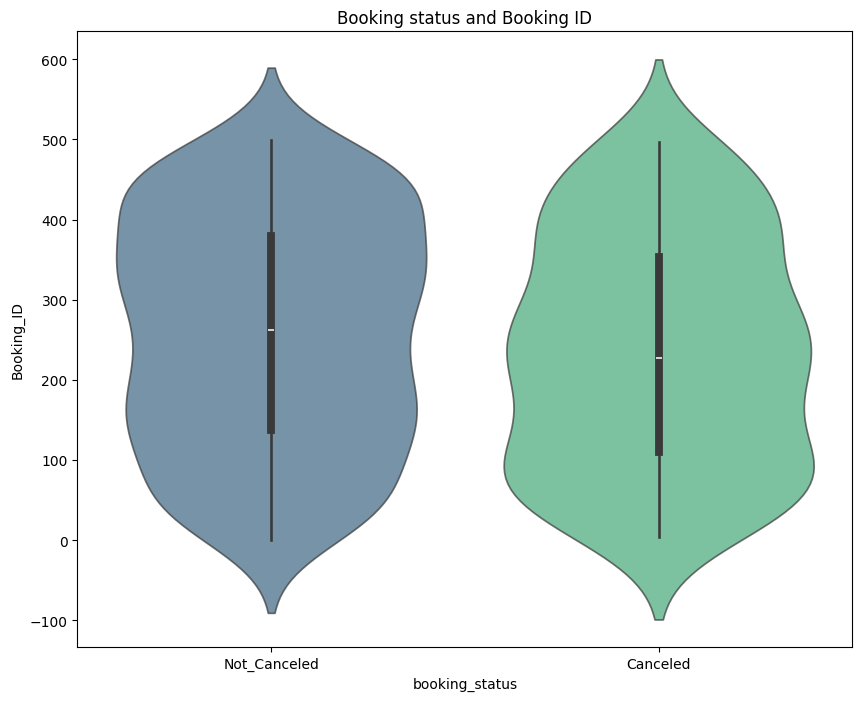

In [ ]:
# Assuming 'df' is your DataFrame with hotel reservations dataset
plt.figure(figsize=(10, 8))

# Using Seaborn to create a violin plot
sns.violinplot(x="booking_status", y="Booking_ID", data=data, palette='viridis', alpha=0.7)

plt.title('Booking status and Booking ID')
plt.xlabel('booking_status')
plt.ylabel('Booking_ID')
plt.show()


###OUTLIER

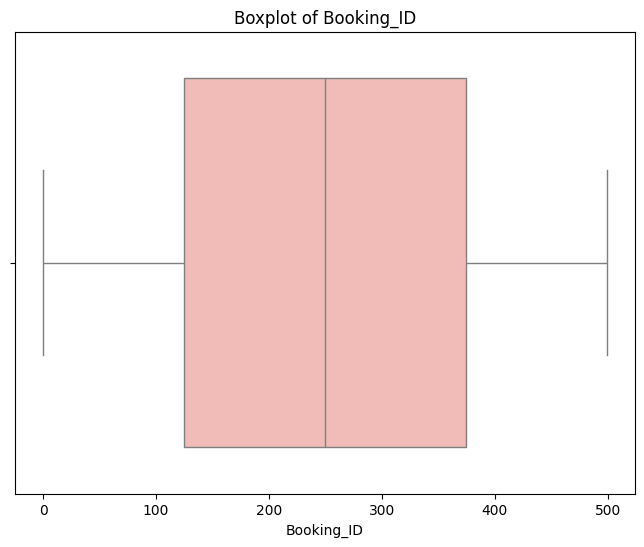

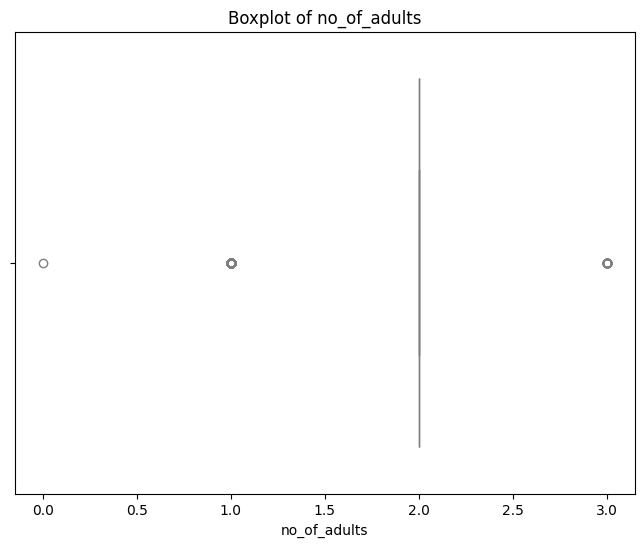

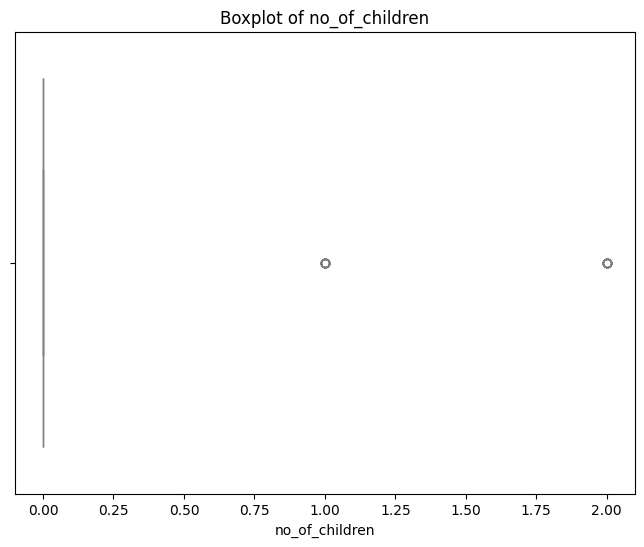

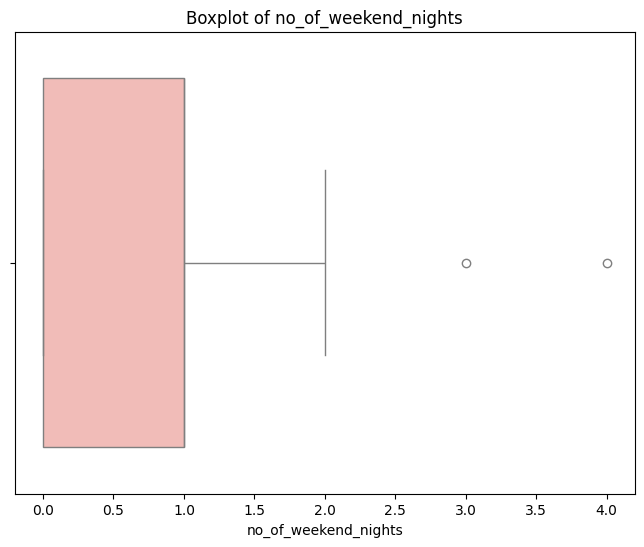

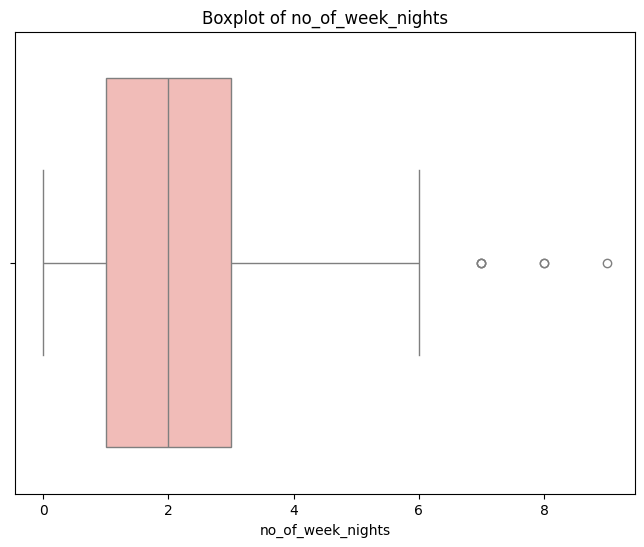

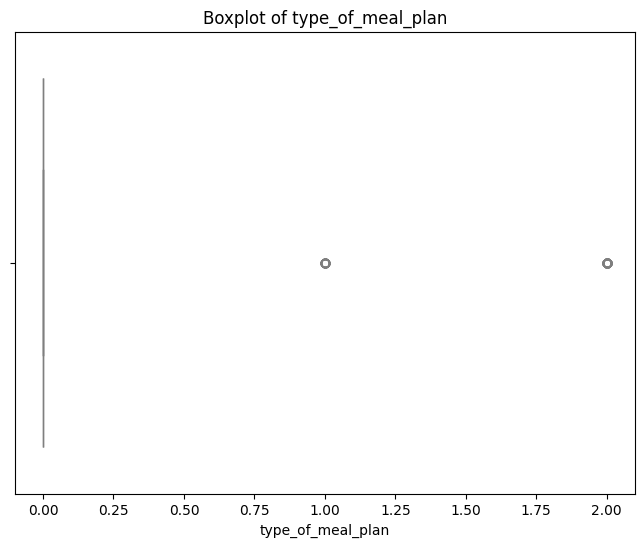

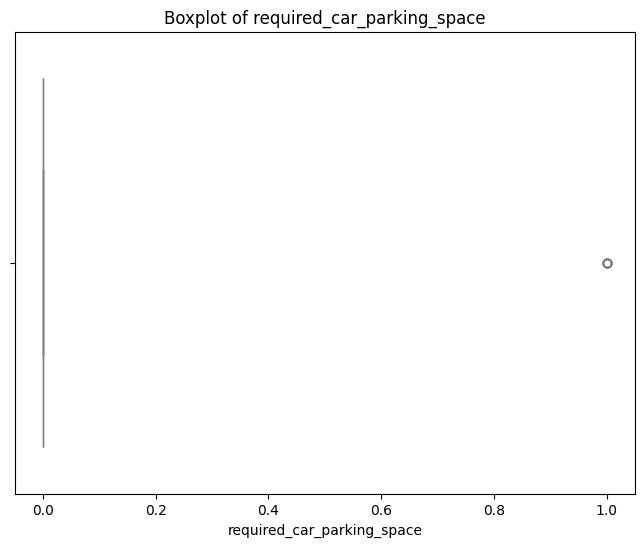

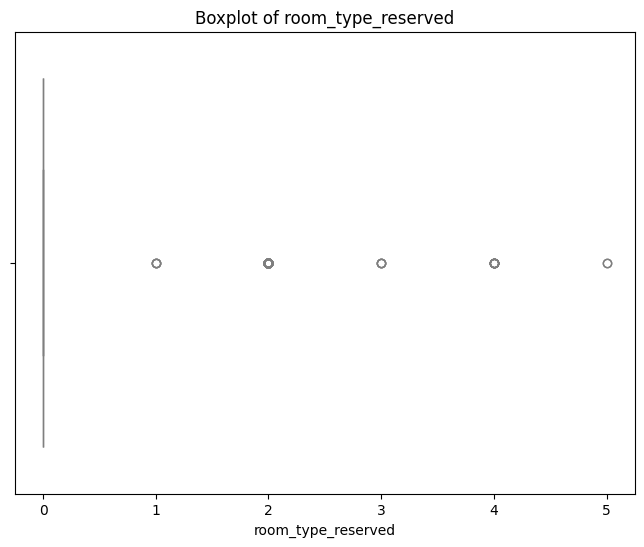

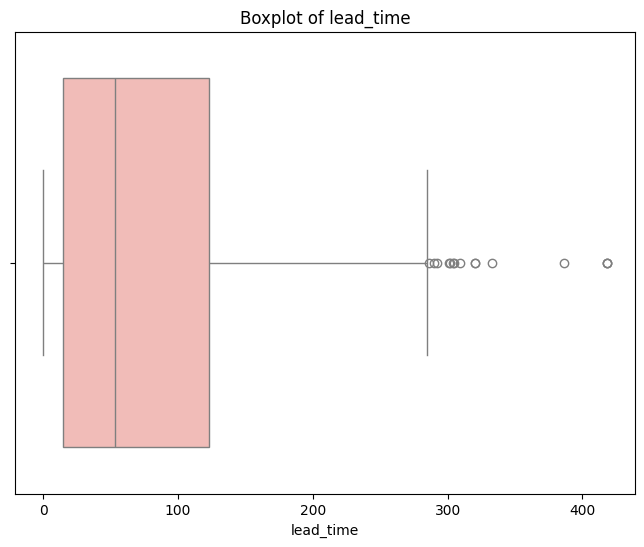

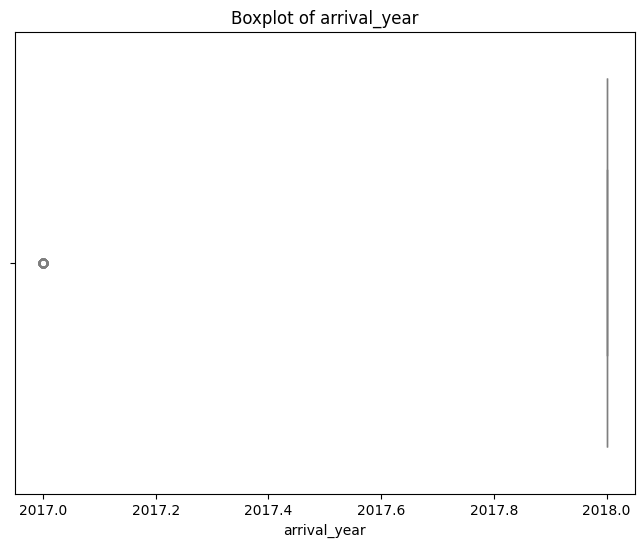

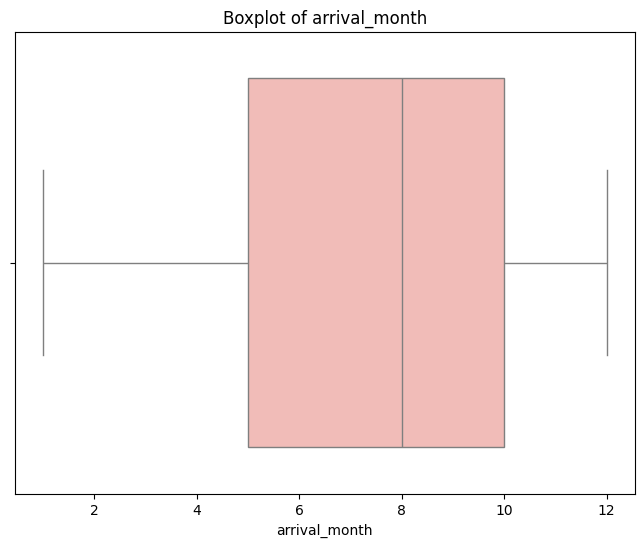

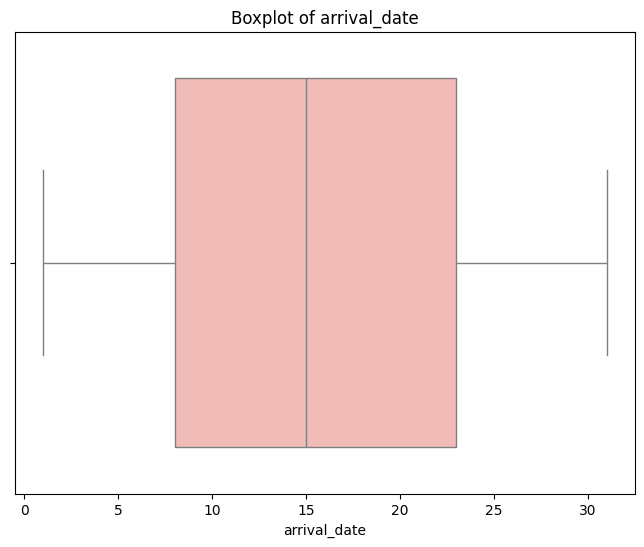

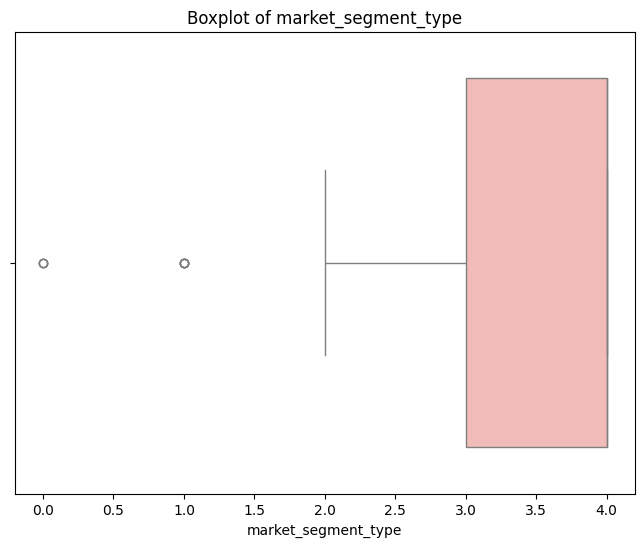

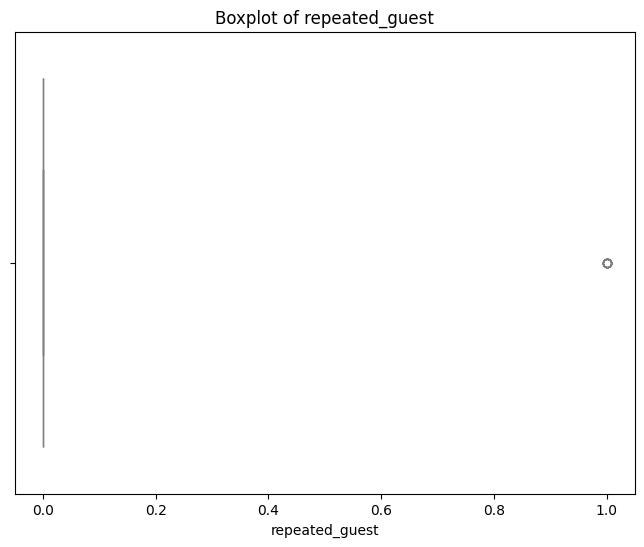

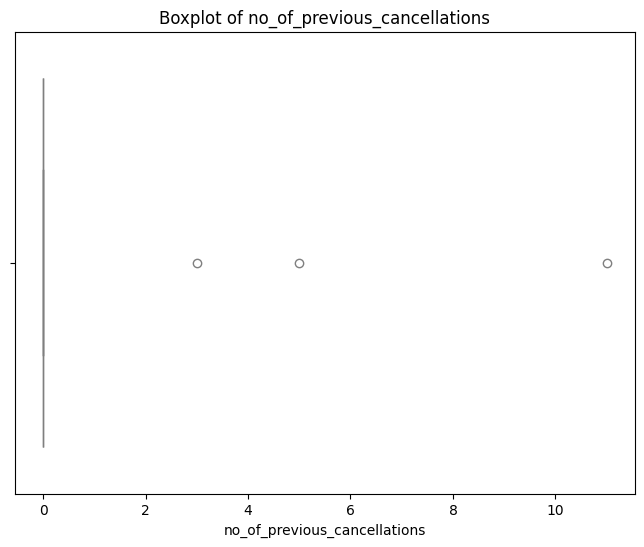

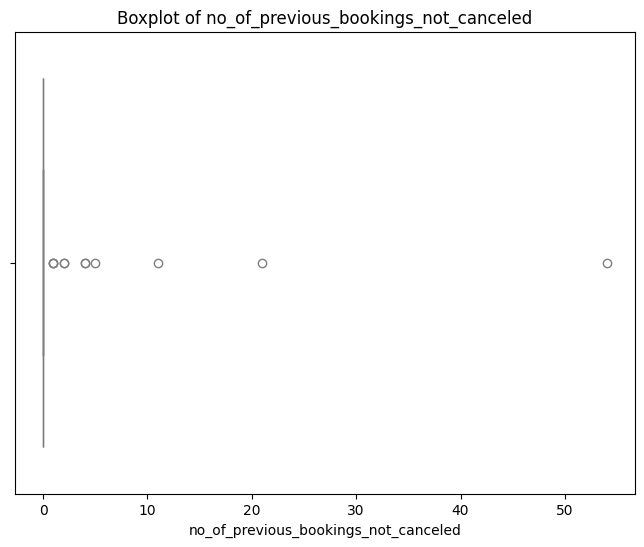

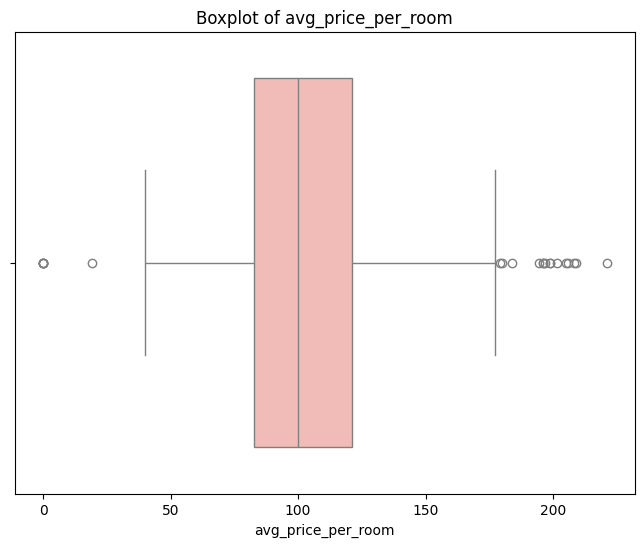

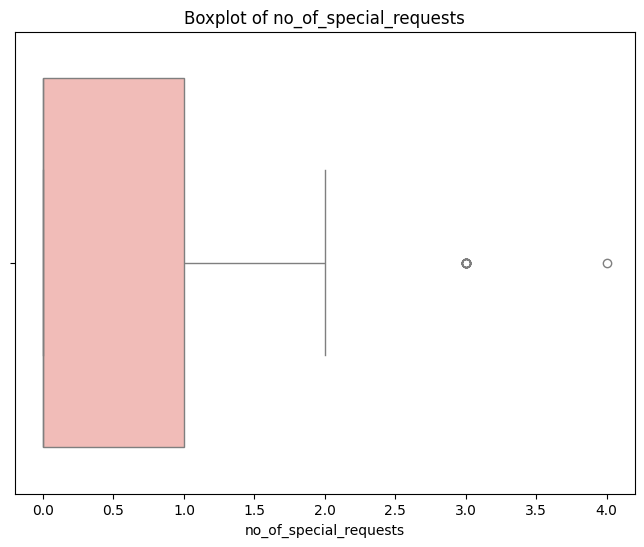

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List kolom numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Buat boxplot untuk setiap kolom numerik
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title('Boxplot of ' + column)
    plt.show()


In [ ]:
from scipy import stats

z_scores = stats.zscore(df['no_of_weekend_nights'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3) # Ambil data yang nilai Z-score-nya kurang dari 3
df = df[filtered_entries]

# Buat boxplot setelah menghapus outlier
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title('Boxplot of ' + column + ' After Removing Outliers')
    plt.show()


NameError: name 'df' is not defined

**Alasan menghapus outlier menggunakan metode z-score karena metode IQR tidak cukup efektif dalam menghapus outlier pada kolom no_of_weekend_nights, Metode Z-score ini menghapus observasi yang memiliki nilai Z-score lebih dari 3 atau kurang dari -3**

###CORRELATIONS MATRIX

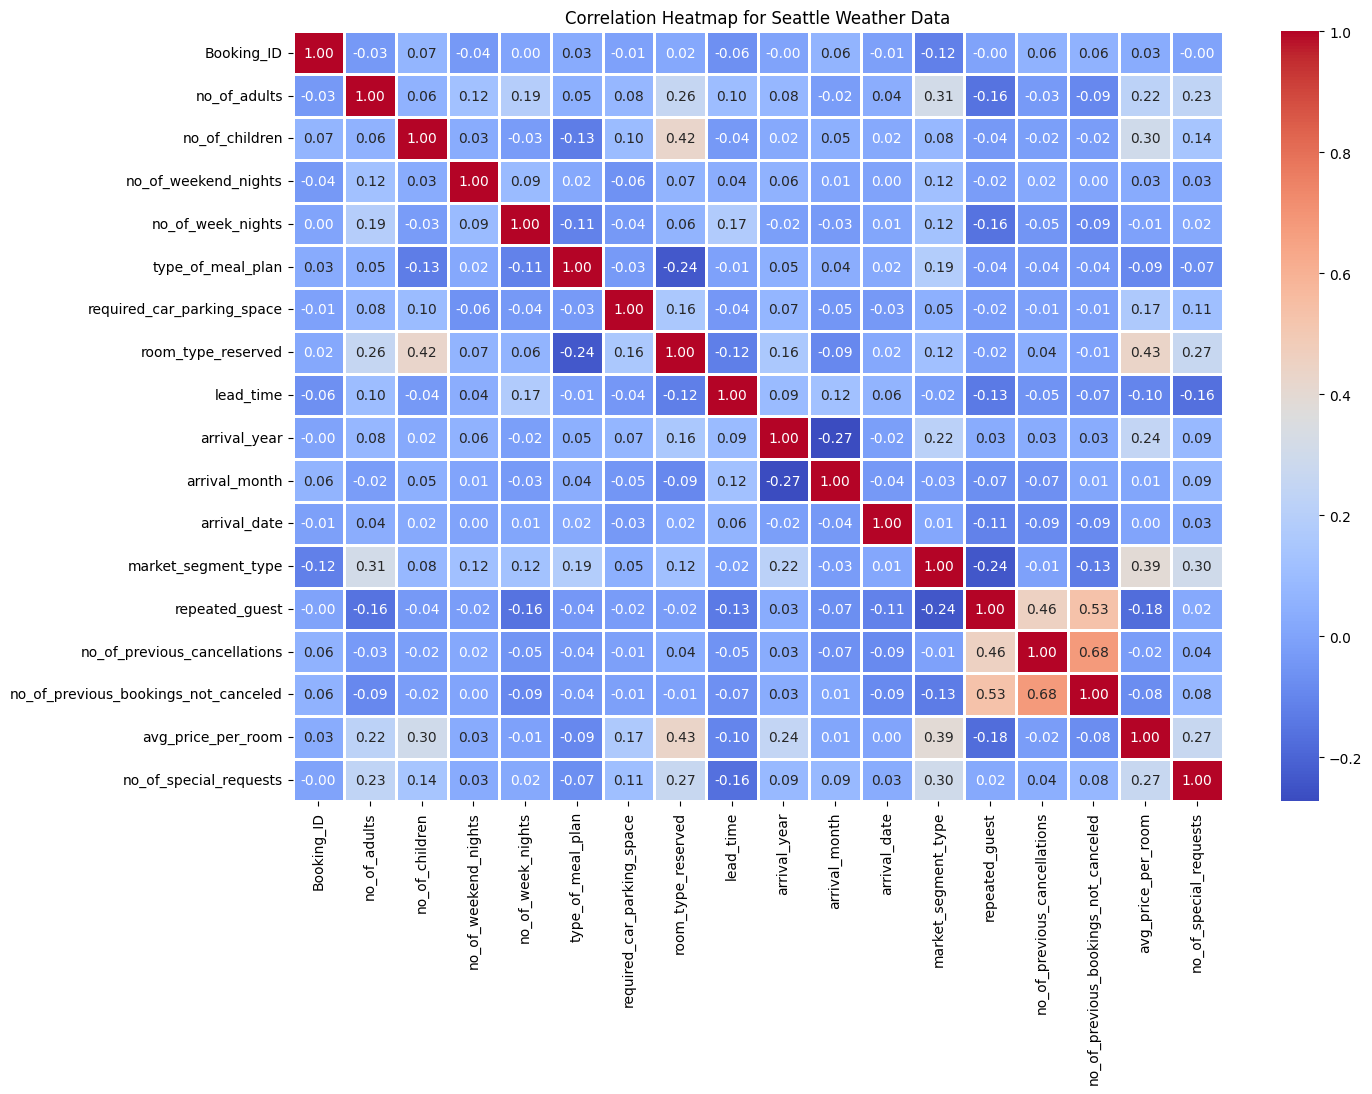

In [ ]:
# Assuming 'dataset' is your DataFrame with weather data
numerical_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)

plt.title('Correlation Heatmap for Seattle Weather Data')
plt.show()


###NORMALISASI

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Dataset baru
data = {
    'Booking_ID': ['INN00001', 'INN00002', 'INN00003', 'INN00004', 'INN00005', 'INN00006', 'INN00007', 'INN00008', 'INN00009', 'INN00010'],
    'no_of_adults': [2, 2, 1, 2, 2, 2, 2, 2, 3, 2],
    'no_of_children': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'no_of_weekend_nights': [1, 2, 2, 0, 1, 0, 1, 1, 0, 0],
    'no_of_week_nights': [2, 3, 1, 2, 1, 2, 3, 3, 4, 5],
    'type_of_meal_plan': ['Meal Plan 1', 'Not Selected', 'Meal Plan 1', 'Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 1', 'Meal Plan 1', 'Meal Plan 1', 'Meal Plan 1'],
    'required_car_parking_space': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'room_type_reserved': ['Room_Type 1', 'Room_Type 1', 'Room_Type 1', 'Room_Type 1', 'Room_Type 1', 'Room_Type 1', 'Room_Type 1', 'Room_Type 4', 'Room_Type 1', 'Room_Type 4'],
    'lead_time': [224, 5, 1, 211, 48, 346, 34, 83, 121, 44],
    'arrival_year': [2017, 2018, 2018, 2018, 2018, 2018, 2017, 2018, 2018, 2018],
    'arrival_month': [10, 11, 2, 5, 4, 9, 10, 12, 7, 10],
    'arrival_date': [2, 6, 28, 20, 11, 13, 15, 26, 6, 18],
    'market_segment_type': ['Offline', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Offline', 'Online'],
    'repeated_guest': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'no_of_previous_cancellations': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'no_of_previous_bookings_not_canceled': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'avg_price_per_room': [65, 10668, 60, 100, 945, 115, 10755, 10561, 969, 13344],
    'no_of_special_requests': [0, 1, 0, 0, 0, 0, 0, 0, 1, 3],
    'booking_status': ['Not_Canceled', 'Not_Canceled', 'Canceled', 'Canceled', 'Canceled', 'Canceled', 'Not_Canceled', 'Not_Canceled', 'Not_Canceled', 'Not_Canceled']
}

# Membuat DataFrame dari dictionary
data = pd.DataFrame(data)

# Konversi kolom 'type_of_meal_plan' dan 'room_type_reserved' menjadi representasi numerik
label_encoder = LabelEncoder()
data['type_of_meal_plan_encoded'] = label_encoder.fit_transform(data['type_of_meal_plan'])
data['room_type_reserved_encoded'] = label_encoder.fit_transform(data['room_type_reserved'])

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom numerik yang akan dinormalisasi
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalisasi kolom numerik menggunakan Min-Max Scaling
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Definisikan features (fitur-fitur) dan target (kelas cuaca)
features = data.drop(['Booking_ID', 'booking_status', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1)
target = data['booking_status']

# Instantiate SMOTE with k_neighbors
smote = SMOTE(k_neighbors=3, random_state=42)

# Terapkan SMOTE pada features dan target
features_resampled, target_resampled = smote.fit_resample(features, target)

# Periksa distribusi kelas setelah SMOTE
print("\nDistribusi Kelas Setelah SMOTE:")
print(target_resampled.value_counts())


Distribusi Kelas Setelah SMOTE:
booking_status
Not_Canceled    6
Canceled        6
Name: count, dtype: int64


In [ ]:
# Assuming 'dataset' is your DataFrame with weather data

booking_status_resampled = pd.Series(target_resampled).value_counts()
plt.figure(figsize=(8, 6))
plt.bar(booking_status_resampled.index, booking_status_resampled, color='darkblue')
plt.title('Count Plot of Hotel Reservations After SMOTE')
plt.xlabel('booking_status')
plt.ylabel('Count')
plt.show()

NameError: name 'df' is not defined